In [1]:
import os
import sys
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from utils.files.file_helper import load_binary_file, save_binary_file
from utils.statistics.correlation import check_correlations

import utils.configuration

import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
config = utils.configuration.Configuration()

In [4]:
MERGED_DATA_LOCATION = config.config['DEFAULT']['MERGED_DATA_LOCATION']
PREPROCESSED_DATA_FILE_BIN = config.config['DEFAULT']['PREPROCESSED_DATA_FILE_BIN']

In [5]:
data = load_binary_file(MERGED_DATA_LOCATION, PREPROCESSED_DATA_FILE_BIN)

## Describing data

### Overall data info

In [6]:
data.describe()

,month,day_of_week,quarter,crs_dep_time,origin_average_wind_speed,origin_snow,origin_snow_depth,origin_thunder,origin_dust,origin_haze,...,dest_haze,origin_fog,origin_hail,origin_damaging_wind,dest_fog,dest_hail,dest_damaging_wind,delay_index,day_of_year,weekend
count,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,...,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07,1.355005e+07
mean,6.550206e+00,3.932943e+00,2.517417e+00,1.302554e+01,3.198400e+01,3.926531e-02,6.464322e+00,1.122426e-01,1.759698e-03,1.365169e-01,...,1.365142e-01,2.959791e-01,1.228711e-02,8.282551e-03,2.959768e-01,1.229361e-02,8.281665e-03,1.976814e-01,3.948869e+02,2.631414e-01
std,3.399145e+00,1.995226e+00,1.104883e+00,4.882945e+00,1.224348e+01,1.942255e-01,4.881155e+01,3.156647e-01,4.191183e-02,3.433366e-01,...,3.433338e-01,4.564816e-01,1.101641e-01,9.063085e-02,4.564806e-01,1.101929e-01,9.062604e-02,3.635517e-02,2.079876e+02,4.403385e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.465382e-02,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.858787e-01,2.160000e+02,0.000000e+00
50%,7.000000e+00,4.000000e+00,3.000000e+00,1.300000e+01,3.198400e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.994630e-01,4.180000e+02,0.000000e+00
75%,9.000000e+00,6.000000e+00,3.000000e+00,1.700000e+01,3.233333e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.026999e-01,5.730000e+02,1.000000e+00
max,1.200000e+01,7.000000e+00,4.000000e+00,2.300000e+01,3.816667e+02,1.000000e+00,1.219000e+03,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.050200e-01,7.290000e+02,1.000000e+00


### Correlations

In [7]:
data.corr()

,month,day_of_week,quarter,crs_dep_time,origin_average_wind_speed,origin_snow,origin_snow_depth,origin_thunder,origin_dust,origin_haze,...,dest_haze,origin_fog,origin_hail,origin_damaging_wind,dest_fog,dest_hail,dest_damaging_wind,delay_index,day_of_year,weekend
month,1.000000,0.020738,0.970483,-0.001550,-0.124620,-0.069920,-0.124017,-0.000750,0.017200,0.030616,...,0.030660,0.019534,-0.051974,-0.020795,0.019542,-0.051949,-0.020837,-0.010708,0.498686,0.018434
day_of_week,0.020738,1.000000,0.012949,0.006987,-0.005504,0.001152,-0.000403,-0.013684,-0.001339,-0.033547,...,-0.033561,-0.012979,-0.014520,-0.025757,-0.013100,-0.014538,-0.025769,0.004179,0.007782,0.780516
quarter,0.970483,0.012949,1.000000,-0.001732,-0.125690,-0.076318,-0.127252,-0.000053,0.016933,0.029730,...,0.029765,0.019979,-0.052670,-0.022254,0.019995,-0.052631,-0.022300,-0.010867,0.484467,0.016714
crs_dep_time,-0.001550,0.006987,-0.001732,1.000000,-0.017062,-0.007694,-0.005554,0.010262,0.000143,0.012386,...,-0.009971,0.007969,0.000914,0.002578,-0.005214,-0.001399,-0.002973,0.010617,-0.001455,0.001193
origin_average_wind_speed,-0.124620,-0.005504,-0.125690,-0.017062,1.000000,0.143109,0.000653,0.006692,0.025696,-0.060292,...,-0.009697,-0.026575,0.093889,0.160132,0.000567,0.032786,0.045416,0.005788,-0.099785,-0.017130
origin_snow,-0.069920,0.001152,-0.076318,-0.007694,0.143109,1.000000,0.296887,-0.034171,-0.003638,0.086465,...,0.016200,0.175354,0.239729,0.095495,0.020332,0.037566,0.025525,-0.007123,-0.111876,0.001032
origin_snow_depth,-0.124017,-0.000403,-0.127252,-0.005554,0.000653,0.296887,1.000000,-0.033640,-0.002740,0.033244,...,0.018912,0.044484,0.052051,0.012752,0.018967,0.021002,0.018283,-0.027626,-0.134712,-0.000182
origin_thunder,-0.000750,-0.013684,-0.000053,0.010262,0.006692,-0.034171,-0.033640,1.000000,0.045372,0.130769,...,0.031268,0.359447,0.115979,0.082368,0.067691,0.004188,0.007506,-0.012991,-0.119913,-0.008979
origin_dust,0.017200,-0.001339,0.016933,0.000143,0.025696,-0.003638,-0.002740,0.045372,1.000000,0.088315,...,0.004257,0.001040,0.028004,0.031659,-0.000954,-0.000513,0.001234,0.000271,-0.008198,-0.004564
origin_haze,0.030616,-0.033547,0.029730,0.012386,-0.060292,0.086465,0.033244,0.130769,0.088315,1.000000,...,0.054833,0.375997,0.037674,0.022040,0.058422,0.015028,0.011652,-0.034718,-0.161820,-0.034305


In [8]:
check_correlations(data)

month-->quarter: r^2=0.970483
day_of_week-->weekend: r^2=0.780516


## Plotting data

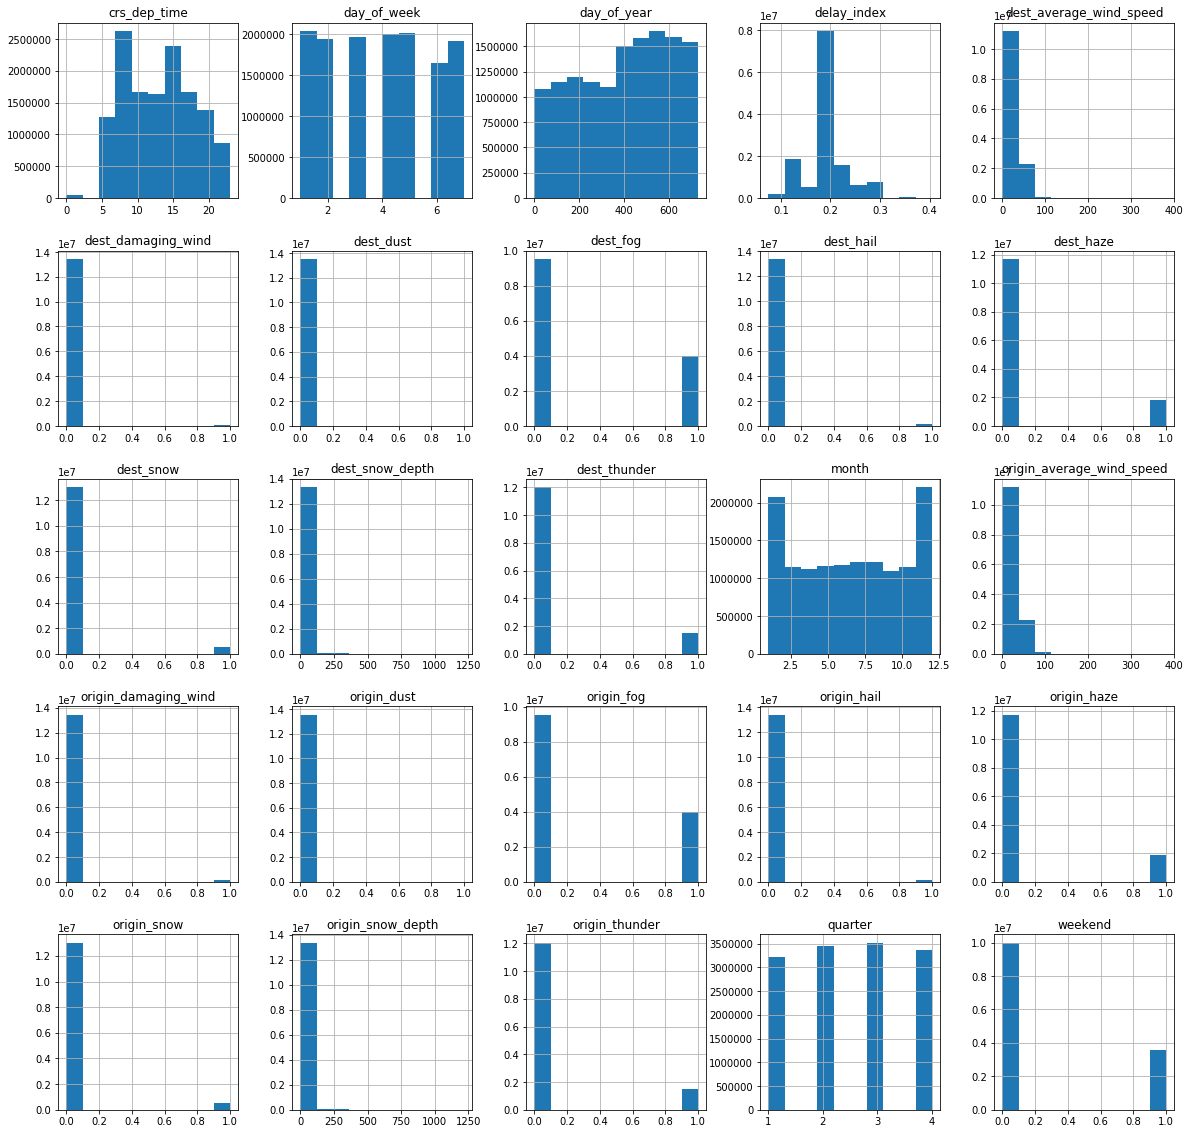

In [9]:
data.hist(figsize=(20, 20));

### Plotting classes

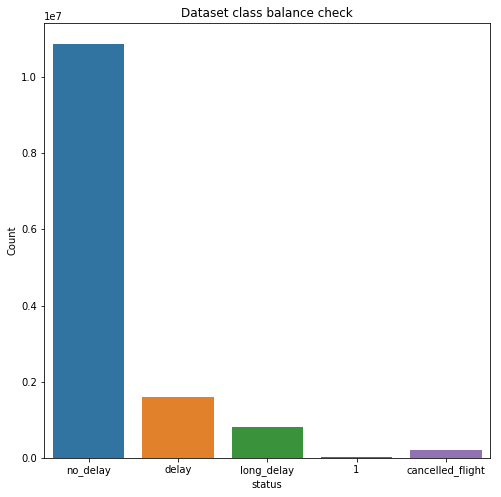

In [10]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x = data.status)
ax.set_title('Dataset class balance check')
ax.set_ylabel('Count')
plt.show()

### Day / delay plot

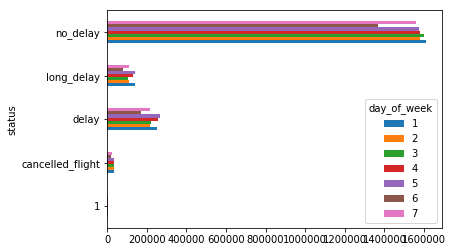

In [11]:
data.groupby('day_of_week').status.value_counts().unstack(0).plot.barh()


### Month / Delay plot

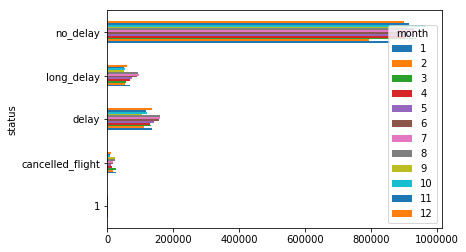

In [12]:
data.groupby('month').status.value_counts().unstack(0).plot.barh()

### Flights per airline plot

In [13]:
airlines_group = data[['status', 'op_unique_carrier']]
airlines_group_num = airlines_group.groupby(['op_unique_carrier']).size()
airlines_group = data[['status', 'op_unique_carrier']]
airlines_group = airlines_group[airlines_group['status'] != 'no_delay']
airlines_group_delays_num = airlines_group.groupby(['op_unique_carrier']).size()
delay_info = pd.DataFrame({'Carrier': np.unique(airlines_group.op_unique_carrier.values), \
                           'Number of flights': airlines_group_num.values, \
                           'Number of delays': airlines_group_delays_num.values})

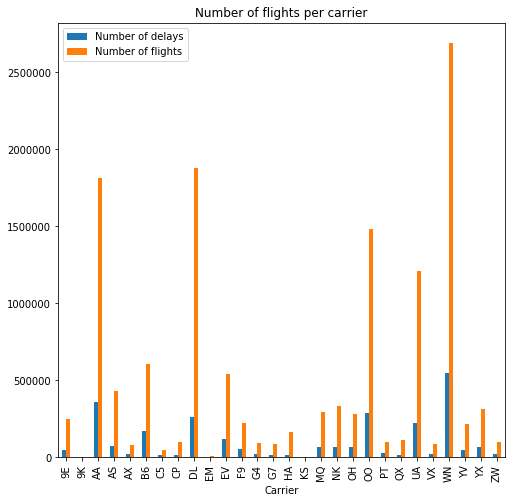

In [14]:
delay_info.plot(kind='bar', figsize=(8, 8), title = 'Number of flights per carrier', x='Carrier')

### Delay ratings

In [15]:
delay_info_rating = delay_info.copy()
delay_info_rating['Delay index'] = delay_info['Number of delays'] / delay_info['Number of flights']

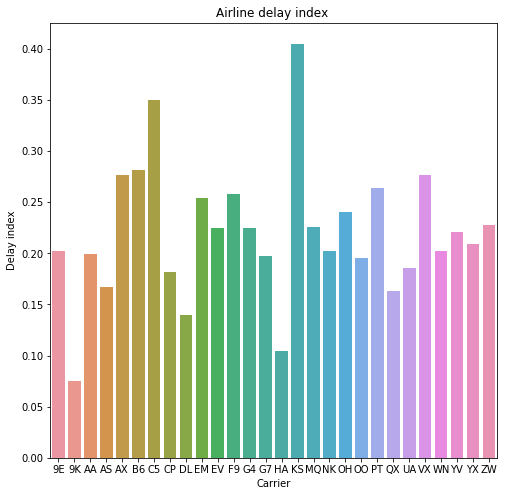

In [16]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x="Carrier", y="Delay index", data=delay_info_rating)
ax.set_title('Airline delay index ')
plt.show()